In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from main import Solver
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from data.createDataset import TrashData
from data.createDataset import CLASSES
from data.createDataset import testTransform
from data.createDataset import augmentTransform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



Show a random image from the dataset and verify the label

Count of classes in train
glass : 354
paper : 403
cardboard : 287
plastic : 347
metal : 286
trash : 91


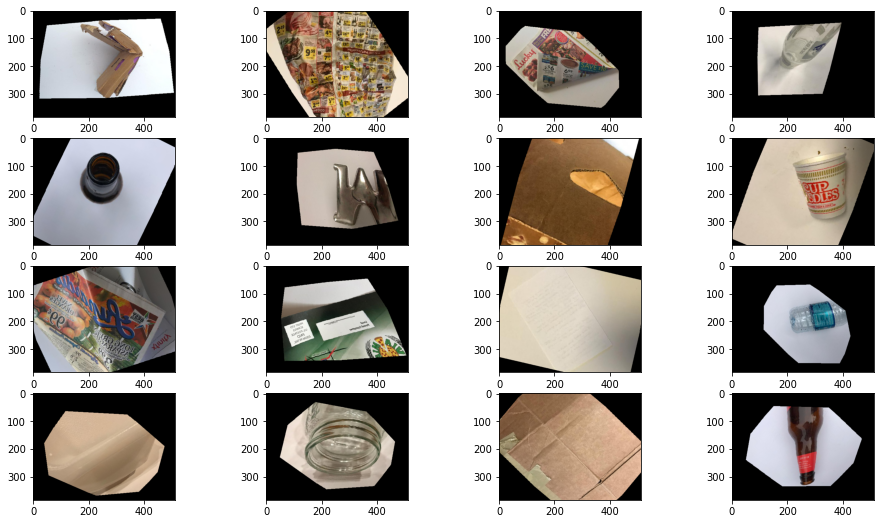

In [4]:
trainSet = DataLoader(TrashData(os.path.join(os.getcwd(), 'data'), set='train', transform=augmentTransform))
loader = iter(trainSet)
num_ims = 4
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(num_ims,num_ims)
ax_flattened = ax.flatten()
for idx, (im, target) in enumerate(loader):
    if idx == num_ims**2:
        break
    ax_flattened[idx].imshow(im[0].numpy()[::-1])

In [6]:
wandb_logger = WandbLogger(project='recycle-plant')
solver = Solver(pretrained=True, num_classes=6)
trainer = pl.Trainer(logger=wandb_logger, gpus=1, max_epochs=200)

trainer.fit(solver)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


wandb: Wandb version 0.10.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade

  | Name    | Type        | Params
----------------------------------------
0 | model   | MobileNetV2 | 2 M   
1 | softmax | Softmax     | 0     
Count of classes in val
glass : 65
paper : 83
cardboard : 46
plastic : 61
metal : 56
trash : 17


Count of classes in train
glass : 354
paper : 403
cardboard : 287
plastic : 347
metal : 286
trash : 91
Count of classes in val
glass : 65
paper : 83
cardboard : 46
plastic : 61
metal : 56
trash : 17


Saving latest checkpoint..



1

Final benchmarking on the test set

In [22]:
res = trainer.test(solver, test_dataloaders=DataLoader(TrashData(solver.datapath, set='val', transform=testTransform), batch_size=32))
print(res)

wandb: Wandb version 0.10.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
Count of classes in val
glass : 65
paper : 83
cardboard : 46
plastic : 61
metal : 56
trash : 17


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'cmatrix': array([[40.,  5.,  4., 11.,  5.,  0.],
       [ 3., 56.,  6., 15.,  0.,  3.],
       [ 4.,  2., 37.,  3.,  0.,  0.],
       [11.,  7.,  7., 32.,  2.,  2.],
       [ 9.,  9.,  1., 15., 21.,  1.],
       [ 2.,  2.,  1.,  5.,  2.,  5.]]),
 'test_acc': tensor(58.2317, device='cuda:0'),
 'test_loss': tensor(1.1167, device='cuda:0')}
--------------------------------------------------------------------------------

[{'test_loss': 1.116675615310669, 'test_acc': 58.23170471191406, 'cmatrix': array([[40.,  5.,  4., 11.,  5.,  0.],
       [ 3., 56.,  6., 15.,  0.,  3.],
       [ 4.,  2., 37.,  3.,  0.,  0.],
       [11.,  7.,  7., 32.,  2.,  2.],
       [ 9.,  9.,  1., 15., 21.,  1.],
       [ 2.,  2.,  1.,  5.,  2.,  5.]])}]


Text(123.0, 0.5, 'Actual')

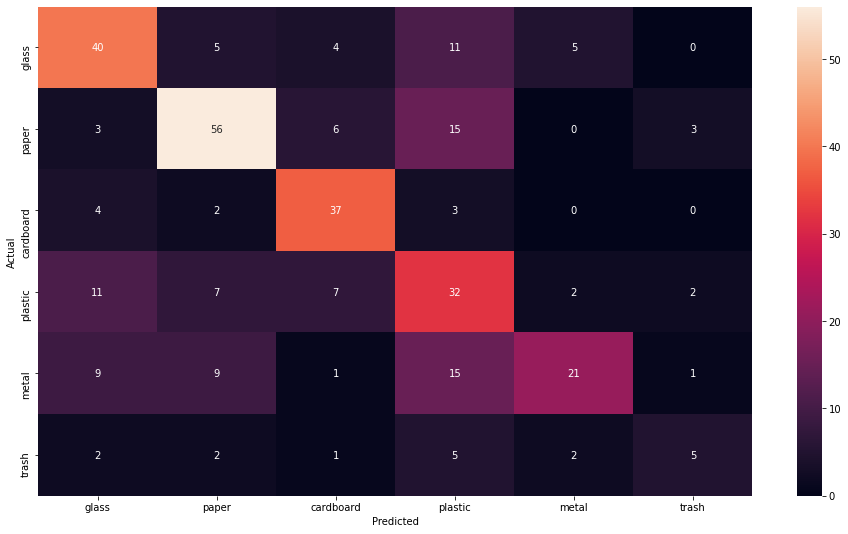

In [23]:
sns.heatmap(res[0]['cmatrix'], annot=True, xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Things I need to

- [x] Plot confusion matrx
- [ ] Try out a new model
- [ ] Plot images with errors
- [ ] Compare against a kNN classifier?
- [ ] Extend image classifier to object detection
- [x] Unfreeze lower layers - training becomes unstable